In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from dateutil import rrule
from datetime import datetime, timedelta
import calendar


In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('BTCUSD.csv')

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

In [6]:
df.head()

,Symbol,Open,High,Low,Close,Volume From,Volume To
Date,,,,,,,
2014-12-01,BTCUSD,300.0,370.0,300.00,370.0,0.05656,19.53
2014-12-02,BTCUSD,370.0,378.0,370.00,378.0,15.01000,5675.07
2014-12-03,BTCUSD,378.0,378.0,377.01,378.0,0.54660,206.52
2014-12-04,BTCUSD,378.0,378.0,377.10,377.1,0.01000,3.77
2014-12-05,BTCUSD,377.1,377.1,377.10,377.1,0.00000,0.00


## Max Delta##
Max delta is defined as the maximum change in price in a given month
This can either be how much BTC rose or how much it fell from it's peak.

It is considered a rise if the monthly high is before the month's low, else it's considered to be a fall.

In [7]:
start = datetime(2015, 1, 1)
end =  datetime(2017, 12, 1)
monthly_max_delta = {1:[],
                     2:[],
                     3:[],
                     4:[],
                     5:[],
                     6:[],
                     7:[],
                     8:[],
                     9:[],
                     10:[],
                     11:[],
                     12:[]}

for dt in rrule.rrule(rrule.MONTHLY, dtstart=start, until=end):
    first = dt
    open_price = df.loc[dt]['Open']
    last = dt.replace(day = calendar.monthrange(dt.year, dt.month)[1])
    month_mask = (df.index>=first) & (df.index<=last)
    high_date = df[month_mask]['High'].idxmax()
    low_date = df[month_mask]['Low'].idxmin()
    rise = high_date>low_date
    delta = 100*(df.loc[high_date]['High'] - df.loc[low_date]['Low'])/open_price
    if not rise:
        delta = -delta
    monthly_max_delta[dt.month].append(delta)
    

In [8]:
monthly_max_delta = pd.DataFrame.from_dict(monthly_max_delta)
monthly_max_delta.index=[2015, 2016, 2017]
monthly_max_delta.rename(lambda x :calendar.month_name[x], axis=1, inplace=True)

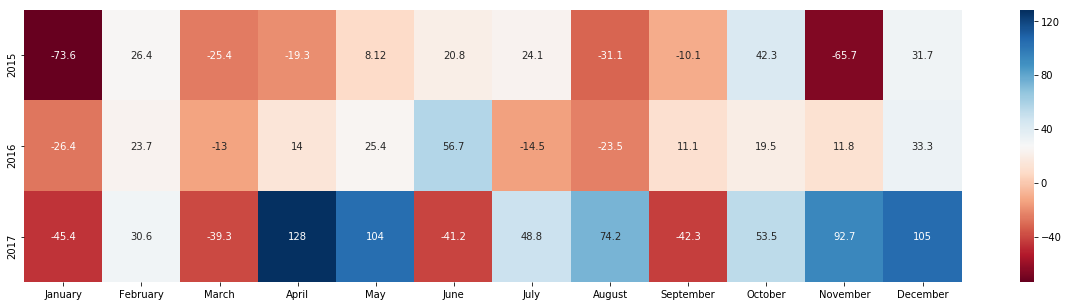

In [9]:
plt.figure(figsize=(21,5))
ax=plt.subplot(111)
sns.heatmap(monthly_max_delta, annot=True, cmap=plt.cm.RdBu, fmt='.3g')

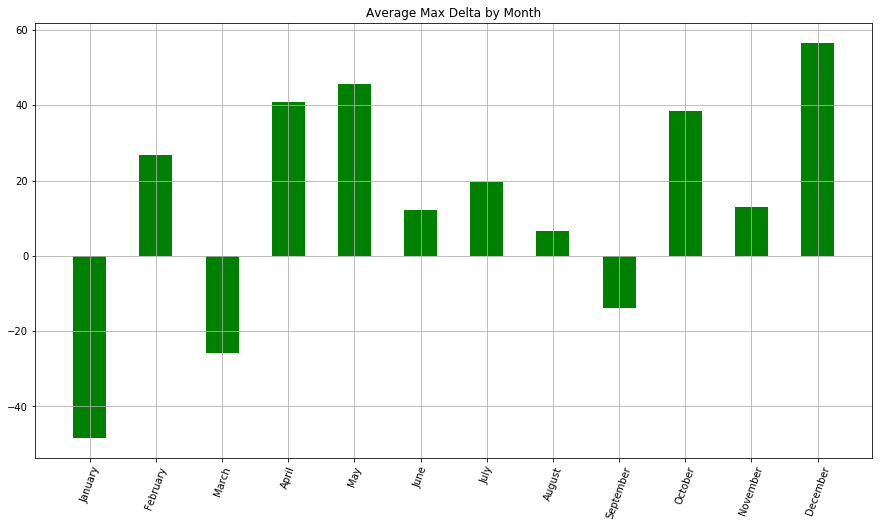

In [10]:
width = 0.5       # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(15,8)
rects1 = ax.bar(range(monthly_max_delta.shape[1]), monthly_max_delta.mean(), width, color='g')
plt.xticks(range(monthly_max_delta.shape[1]), monthly_max_delta.columns,rotation=70)
plt.xticks(rotation=70)
plt.title('Average Max Delta by Month')
plt.grid()

## Monthly Return ##

Monthly return is calculated as the percentage change in the price of BTC each month.

In [11]:
start = datetime(2015, 1, 1)
end =  datetime(2017, 12, 1)
monthly_return = {1:[],
                 2:[],
                 3:[],
                 4:[],
                 5:[],
                 6:[],
                 7:[],
                 8:[],
                 9:[],
                 10:[],
                 11:[],
                 12:[]}

for dt in rrule.rrule(rrule.MONTHLY, dtstart=start, until=end):
    last = dt.replace(day = calendar.monthrange(dt.year, dt.month)[1])
    open_price = df.loc[dt]['Open']
    close_price = df.loc[last]['Close']
    return_perc = 100*(close_price-open_price)/open_price
    monthly_return[dt.month].append(return_perc)   

monthly_return = pd.DataFrame.from_dict(monthly_return)
monthly_return.index=[2015, 2016, 2017]
monthly_return.rename(lambda x :calendar.month_name[x], axis=1, inplace=True)

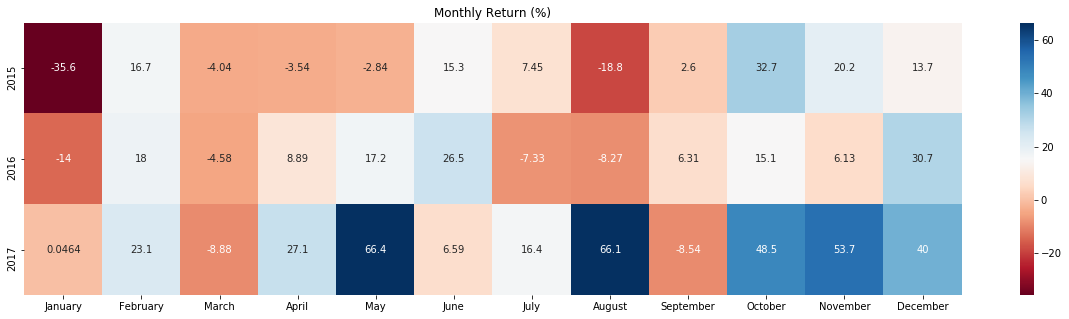

In [12]:
plt.figure(figsize=(21,5))
ax=plt.subplot(111)
plt.title('Monthly Return (%)')
sns.heatmap(monthly_return, annot=True, cmap=plt.cm.RdBu, fmt='.3g')

Text(0.5,1,'Average Returns by Month (%)')

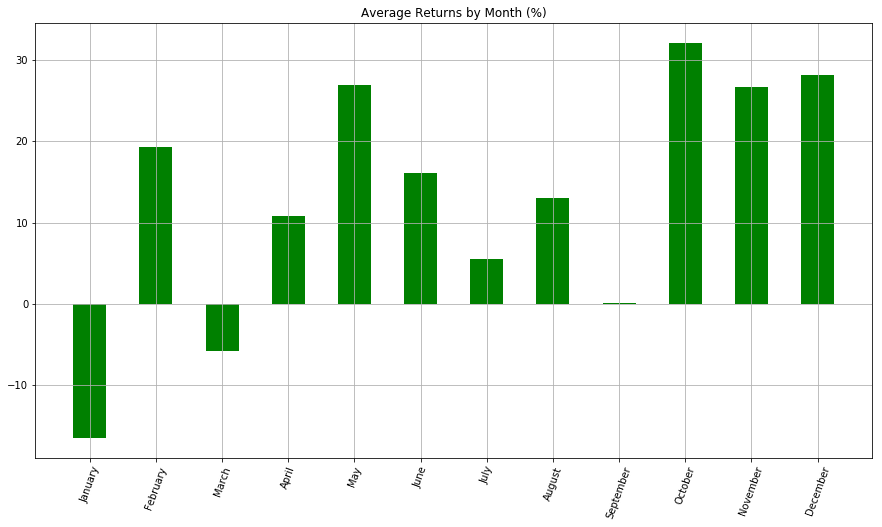

In [13]:
width = 0.5       # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(15,8)
rects1 = ax.bar(range(monthly_return.shape[1]), monthly_return.mean(), width, color='g')
plt.xticks(range(monthly_return.shape[1]), monthly_return.columns,rotation=70)
plt.grid()
plt.title('Average Returns by Month (%)')

## Monthly Max Drawdown ##

Max Drawdown is the maximum loss from a peak to a trough.
Taking into account the exponential growth of BTC, we rescale it by dividing it by the open price at the begining of the month 

In [36]:
start = datetime(2015, 1, 1)
end =  datetime(2017, 12, 1)
monthly_max_dd = {1:[],
                 2:[],
                 3:[],
                 4:[],
                 5:[],
                 6:[],
                 7:[],
                 8:[],
                 9:[],
                 10:[],
                 11:[],
                 12:[]}

for dt in rrule.rrule(rrule.MONTHLY, dtstart=start, until=end):
    last = dt.replace(day = calendar.monthrange(dt.year, dt.month)[1])
    month_mask = (df.index>=dt) & (df.index<=last)
    max_dd = np.max(np.maximum.accumulate(df[month_mask]['High']) - df[month_mask]['Low'])/df.loc[dt]['Open']
    monthly_max_dd[dt.month].append(max_dd)   

monthly_max_dd = pd.DataFrame.from_dict(monthly_max_dd)
monthly_max_dd.index=[2015, 2016, 2017]
monthly_max_dd.rename(lambda x :calendar.month_name[x], axis=1, inplace=True)

In [37]:
monthly_max_dd

,January,February,March,April,May,June,July,August,September,October,November,December
2015,0.735676,0.182009,0.254196,0.193427,0.076292,0.086784,0.165622,0.310700,0.101116,0.129381,0.656929,0.175396
2016,0.263833,0.104646,0.129889,0.090265,0.153149,0.453497,0.144620,0.234843,0.069105,0.073447,0.108664,0.090749
2017,0.453760,0.158612,0.393237,1.133105,0.644838,0.412449,0.357569,0.309968,0.422642,0.187230,0.439875,0.958496


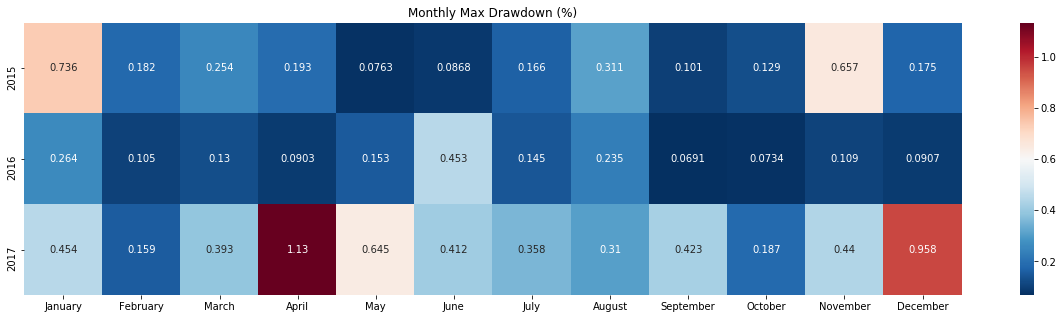

In [40]:
plt.figure(figsize=(21,5))
ax=plt.subplot(111)
plt.title('Monthly Max Drawdown (%)')
sns.heatmap(monthly_max_dd, annot=True, cmap=plt.cm.RdBu_r, fmt='.3g')

Text(0.5,1,'Max Draw Down by Month (%)')

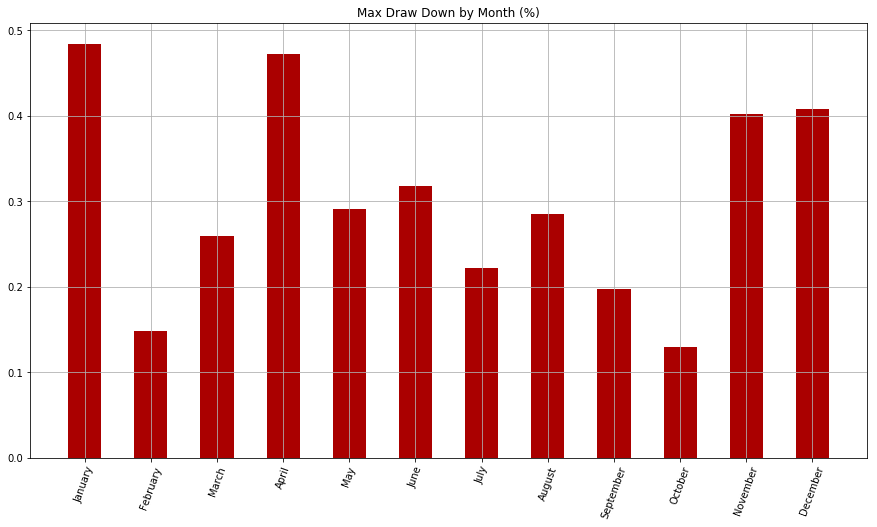

In [48]:
width = 0.5       # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(15,8)
rects1 = ax.bar(range(monthly_max_dd.shape[1]), monthly_max_dd.mean(), width, color='#aa0000')
plt.xticks(range(monthly_max_dd.shape[1]), monthly_max_dd.columns,rotation=70)
plt.grid()
plt.title('Max Draw Down by Month (%)')

## Monthly Max DrawUp ##

Max Drawdown is the maximum loss from a peak to a trough.
Max Drawup is the opposite of that, i.e. maximum profit from trough to a peak.

Taking into account the exponential growth of BTC, we rescale it by dividing it by the open price at the begining of the month.

In [49]:
start = datetime(2015, 1, 1)
end =  datetime(2017, 12, 1)
monthly_max_du = {1:[],
                 2:[],
                 3:[],
                 4:[],
                 5:[],
                 6:[],
                 7:[],
                 8:[],
                 9:[],
                 10:[],
                 11:[],
                 12:[]}

for dt in rrule.rrule(rrule.MONTHLY, dtstart=start, until=end):
    last = dt.replace(day = calendar.monthrange(dt.year, dt.month)[1])
    month_mask = (df.index>=dt) & (df.index<=last)
    max_du = np.max(df[month_mask]['High'] - np.minimum.accumulate(df[month_mask]['Low']))/df.loc[dt]['Open']
    monthly_max_du[dt.month].append(max_du)   

monthly_max_du = pd.DataFrame.from_dict(monthly_max_du)
monthly_max_du.index=[2015, 2016, 2017]
monthly_max_du.rename(lambda x :calendar.month_name[x], axis=1, inplace=True)

In [50]:
monthly_max_du

,January,February,March,April,May,June,July,August,September,October,November,December
2015,0.626029,0.264201,0.208068,0.099649,0.081238,0.207978,0.240621,0.166608,0.092593,0.422933,0.599332,0.316606
2016,0.172463,0.236872,0.104044,0.139900,0.253572,0.567050,0.114417,0.209231,0.110534,0.195359,0.118025,0.333006
2017,0.303976,0.305823,0.337341,1.280498,1.036452,0.317628,0.488272,0.741729,0.291165,0.535174,0.926902,1.047661


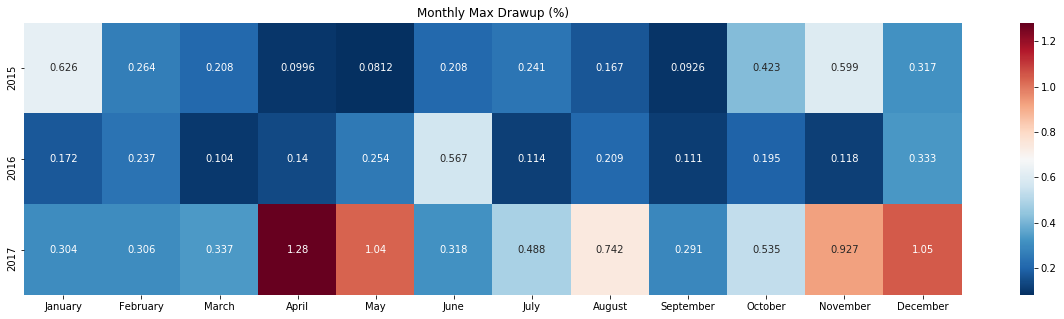

In [51]:
plt.figure(figsize=(21,5))
ax=plt.subplot(111)
plt.title('Monthly Max Drawup (%)')
sns.heatmap(monthly_max_du, annot=True, cmap=plt.cm.RdBu_r, fmt='.3g')

Text(0.5,1,'Max Draw up by Month (%)')

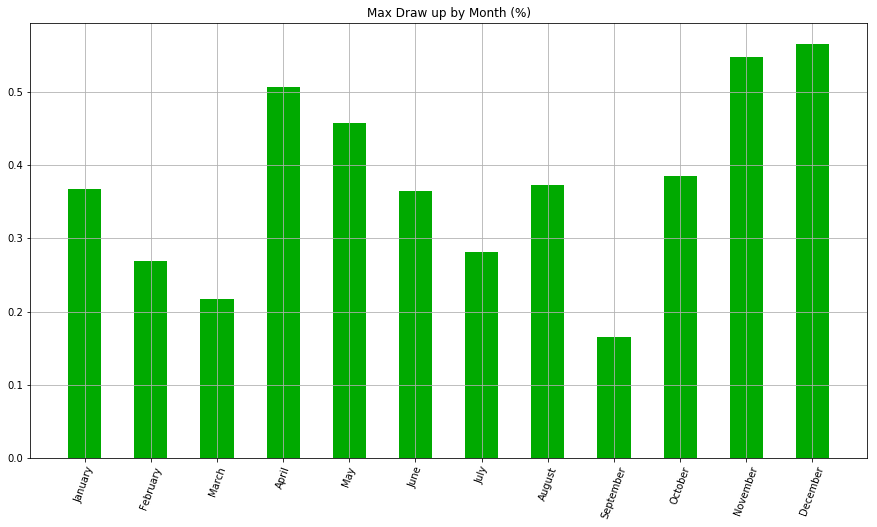

In [54]:
width = 0.5       # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(15,8)
rects1 = ax.bar(range(monthly_max_du.shape[1]), monthly_max_du.mean(), width, color='#00aa00')
plt.xticks(range(monthly_max_du.shape[1]), monthly_max_du.columns,rotation=70)
plt.grid()
plt.title('Max Draw up by Month (%)')

## Draw Up vs Draw Down

Text(0.5,1,'Max Draw up/Max Draw down by Month (%)')

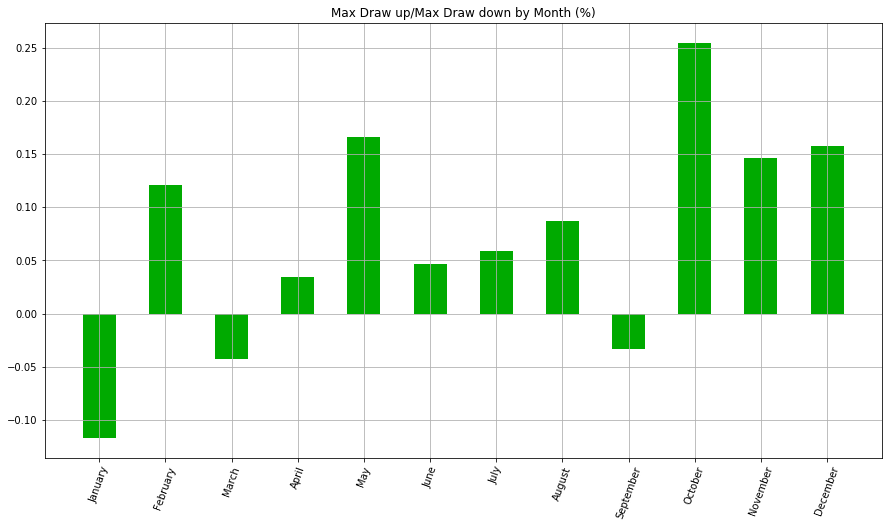

In [62]:
width = 0.5       # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(15,8)
rects1 = ax.bar(range(monthly_max_dd.shape[1]), (monthly_max_du-monthly_max_dd).mean(), width, color='#00aa00')
plt.xticks(range(monthly_max_dd.shape[1]), monthly_max_dd.columns,rotation=70)
plt.grid()
plt.title('Max Draw up/Max Draw down by Month (%)')

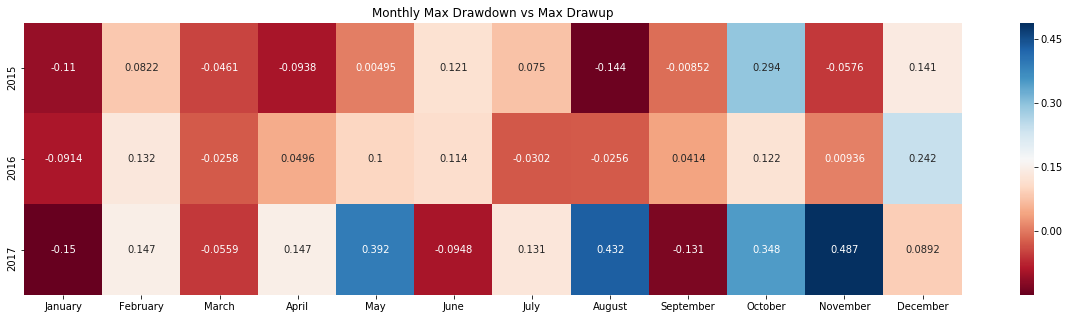

In [59]:
plt.figure(figsize=(21,5))
ax=plt.subplot(111)
plt.title('Monthly Max Drawdown vs Max Drawup')
sns.heatmap(monthly_max_du - monthly_max_dd, annot=True, cmap=plt.cm.RdBu, fmt='.3g')